In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import readfile
import json
import math
import community as community_louvain

Create and load Graph

In [2]:
with open("2020/nodes_tuple.json", "rt") as nod:
    nodes_list = json.load(nod)
nodes = [tuple(l) for l in nodes_list]
with open("2020/edges_tuple.json", "rt") as ed:
    edges_list = json.load(ed)
edges = [tuple(ee) for ee in edges_list]
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

In [3]:
# basic information

In [3]:
G.remove_node('\\n')
print("Number of Nodes: ", len(G.nodes()))
print("Number of Edges: ", len(G.edges()))

Number of Nodes:  4227
Number of Edges:  4691185


In [ ]:
# Node Pruning

In [44]:
with open("clique_list.json", "rt") as clique:
    general_keys = json.load(clique)
for kw in list(general_keys):
    if kw in G:
        G.remove_node(kw)

In [4]:
print("Number of Nodes: ", len(G.nodes()))
print("Number of Edges: ", len(G.edges()))

Number of Nodes:  4227
Number of Edges:  4691185


In [5]:
#Degree calculation

In [5]:
for node_temp in G.nodes():
    wt = 0
    deg = 0
    for nbr, eattr in G.adj[node_temp].items():
        wt = wt + eattr['weight']
        deg += 1
    G.nodes[node_temp]['deg_wt'] = wt
    G.nodes[node_temp]['deg'] = deg

In [7]:
#Degree distrivution

Text(0, 0.5, 'Frequency')

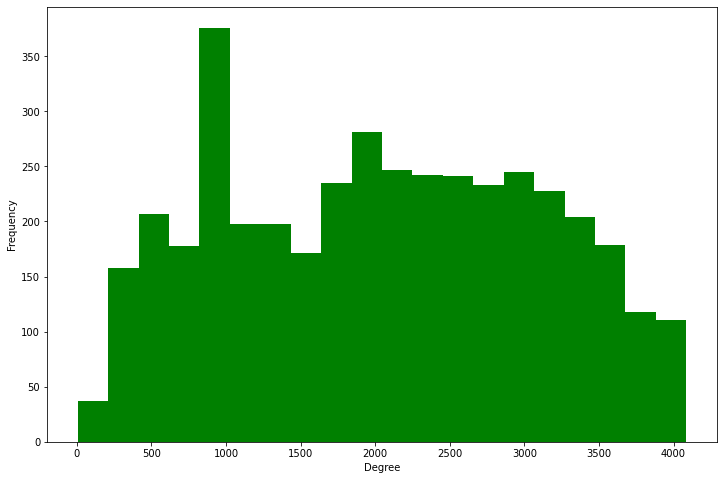

In [48]:
degree_freq = []
for nod in G.nodes:
    degree_freq.append(G.nodes[nod]['deg'])

degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.hist(degree_freq, color='green', bins=20) 
plt.xlabel('Degree')
plt.ylabel('Frequency')

In [49]:
# Average degree
print(sum(degree_freq)/len(G.nodes))
print(min(degree_freq))
print(max(degree_freq))

2043.9495962808905
5
4086


In [10]:
#Weight Distribution

Text(0, 0.5, 'Frequency')

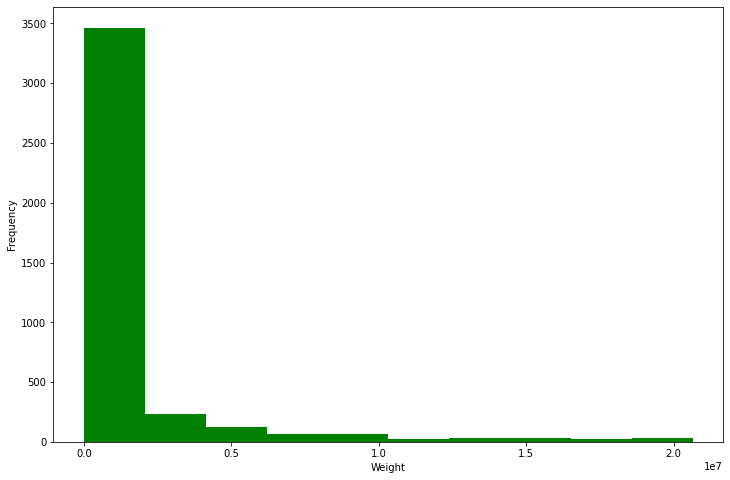

In [50]:
weight_freq = []
for nod in G.nodes:
    weight_freq.append(G.nodes[nod]['deg_wt'])

weights = range(len(weight_freq))
plt.figure(figsize=(12, 8)) 
plt.hist(weight_freq, color='green') 
plt.xlabel('Weight')
plt.ylabel('Frequency')

In [6]:
# average Weight
print(sum(weight_freq)/len(G.nodes))
print(min(weight_freq))
print(max(weight_freq))

NameError: name 'weight_freq' is not defined

In [13]:
# sort nodes based on degree

In [7]:
degree_freq = {}
for nod in G.nodes:
    degree_freq[nod] = G.nodes[nod]['deg']
sorted_degree = dict(sorted(degree_freq.items(), key=lambda item: item[1], reverse=True))
print(sorted_degree)

{'window': 4226, 'name': 4226, 'location': 4226, 'top': 4226, 'document': 4226, 'var': 4226, 'null': 4225, 'length': 4225, 'init': 4225, 'self': 4223, 'replace': 4223, 'parent': 4223, 'opener': 4222, 'frames': 4222, 'Math': 4222, 'type': 4222, 'body': 4221, 'function': 4220, 'push': 4219, 'prototype': 4219, 'toString': 4218, 'call': 4218, 'Date': 4217, 'setTimeout': 4216, 'createElement': 4215, 'Array': 4215, 'src': 4215, 'object': 4214, 'value': 4214, 'id': 4214, 'join': 4213, 'slice': 4212, 'arguments': 4211, 'string': 4211, 'in': 4211, 'delete': 4210, 'apply': 4209, 'void': 4209, 'hasOwnProperty': 4208, 'instanceof': 4207, 'data': 4207, 'String': 4207, 'Object': 4205, 'number': 4202, 'url': 4202, 'on': 4197, 'splice': 4195, 'get': 4195, 'max': 4195, 'target': 4195, 'undefined': 4194, 'addEventListener': 4194, 'log': 4191, 'style': 4185, 'min': 4184, 'left': 4184, 'none': 4184, 'charCodeAt': 4184, 'forEach': 4183, 'filter': 4183, 'random': 4182, 'keys': 4181, 'constructor': 4181, 'op

In [37]:
print(G.adj['hh'])

{'currentTranslate': {'weight': 15}, 'keyup': {'weight': 23905}, 'ancestorOrigins': {'weight': 2022}, 'ononline': {'weight': 1}, 'pageY': {'weight': 3064}, 'SVGDescElement': {'weight': 6}, 'contentWindow': {'weight': 5668}, 'execCommand': {'weight': 202}, 'clientHeight': {'weight': 9726}, 'productId': {'weight': 1128}, 'form': {'weight': 24291}, 'setStyles': {'weight': 38}, 'addColorStop': {'weight': 10}, 'center': {'weight': 4360}, 'filename': {'weight': 538}, 'exitFullscreen': {'weight': 311}, 'connection': {'weight': 646}, 'webglcontextcreationerror': {'weight': 6}, 'failIfMajorPerformanceCaveat': {'weight': 2}, 'InvalidStateError': {'weight': 24}, 'localStorage': {'weight': 6171}, 'NON_TRANSIENT_ERR': {'weight': 1}, 'xpi': {'weight': 4}, 'clientId': {'weight': 10343}, 'mapping': {'weight': 429}, 'maxMessageSize': {'weight': 1}, 'touchstart': {'weight': 2860}, 'onconnect': {'weight': 56}, 'duration': {'weight': 15172}, 'updateCommands': {'weight': 38}, 'fillText': {'weight': 198}, '

In [15]:
# sort nodes based on weight

In [8]:
weight_freq = {}
for nod in G.nodes:
    weight_freq[nod] = G.nodes[nod]['deg_wt']
sorted_weight = dict(sorted(weight_freq.items(), key=lambda item: item[1], reverse=True))
print(sorted_weight)

{'document': 26308990, 'var': 26303742, 'window': 26301809, 'name': 26298690, 'location': 26276335, 'top': 26170664, 'init': 26117693, 'frames': 26056015, 'parent': 26038431, 'null': 25999373, 'self': 25935531, 'opener': 25901335, 'length': 25875557, 'createElement': 25871379, 'src': 25836820, 'type': 25567143, 'push': 25443987, 'replace': 25435682, 'appendChild': 25245403, 'Date': 25216326, 'setTimeout': 25112792, 'prototype': 25105770, 'call': 25102203, 'id': 25090573, 'Math': 25087332, 'join': 24953289, 'addEventListener': 24885981, 'undefined': 24871952, 'function': 24850798, 'toString': 24801454, 'getElementsByTagName': 24777307, 'string': 24776401, 'href': 24724412, 'Object': 24714980, 'Array': 24684729, 'object': 24612537, 'hasOwnProperty': 24594838, 'navigator': 24593432, 'slice': 24584465, 'arguments': 24578200, 'style': 24456551, 'value': 24438436, 'body': 24297489, 'apply': 24129273, 'random': 24097150, 'parentNode': 24094849, 'data': 24065872, 'userAgent': 23938664, 'match'

In [17]:
# Check whether the graph is connected

In [53]:
nx.is_connected(G)

True

In [19]:
# Clustering Coefficient

In [54]:
nx.average_clustering(G)

0.8498413397935699

In [21]:
# average_shortest_path_length

In [9]:
nx.average_shortest_path_length(G)

KeyboardInterrupt: 

In [23]:
# Find connected components

In [24]:
nx.connected_components(G)

<generator object connected_components at 0x7f3365535190>

In [56]:
largest_cc = max(nx.connected_components(G), key=len)
print(largest_cc)

{'clearDepth', 'AudioParam', 'hasOwnProperty', 'ClientRect', 'newVersion', 'rootNode', 'vertexAttribIPointer', 'SVGEvent', 'SVGFEFuncAElement', 'dependentLocality', 'addEvent', 'comparePoint', 'NEXT', 'EXT_disjoint_timer_query', 'canBubble', 'isPrimary', 'timestampOffset', 'expiration', 'redirectEnd', 'MSFullscreenChange', 'sidebar', 'clearData', 'dischargingtimechange', 'QUERY_COUNTER_BITS_EXT', 'width', 'vertexAttrib4fv', 'hasAttribute', 'started', 'iceServers', 'clearColor', 'HTMLTableSectionElement', 'pageLeft', 'createTouch', 'focused', 'addListener', 'magnify', 'oncanplay', 'require', 'tableValues', 'loopEnd', 'compareBoundaryPoints', 'MEDIA_ERR_NETWORK', 'embeds', 'skewx', 'vrdisplaypresentchange', 'stageParameters', 'strokeText', 'speak', 'Float32Array', 'encrypted', 'timecode', 'loadend', 'formmethod', 'badge', 'canMakePayment', 'receiver', 'SVGElementInstanceList', 'characterData', 'Int32Array', 'typeName', 'DOMElementNameChanged', 'referrer', 'deleteIndex', 'languagechange',

In [10]:
print(len(G))
subgraphs =[G.subgraph(c) for c in nx.connected_components(G)]
print(subgraphs)
print(type(subgraphs))
print(len(subgraphs))

4227
<class 'list'>
1


In [27]:
print(subgraphs[0].nodes)

['ancestorOrigins', 'localStorage', 'storageArea', 'pointerenter', 'declare', 'PAGE_RULE', 'getLocalParameters', 'grad', 'PaymentRequest', 'senderId', 'mute', 'createSampler', 'SVGPathSegMovetoRel', 'onspeechstart', 'sessionId', 'addElement', 'cartebancaire', 'external', 'responsesReceived', 'onpopstate', 'onload', 'keyboard', 'getNamedItemNS', 'getAttributeNames', 'operation', 'insertNode', 'point', 'paste', 'loadEventStart', 'CSSStyleSheet', 'NetworkInformation', 'notificationclick', 'col', 'mastercard', 'referrer', 'currentTranslate', 'torch', 'SVGDescElement', 'connection', 'charIndex', 'onstart', 'MIDIConnectionEvent', 'datachannel', 'nodes', 'resetPose', 'ArrayBufferView', 'iterationStart', 'requestPointerLock', 'bindAttribLocation', 'messageType', 'IDBObjectStore', 'ondevicelight', 'vpn', 'vb', 'endOffset', 'replaceWholeText', 'decode', 'navigationStart', 'setMatrix', 'cancelBubble', 'OES_texture_float', 'Body', 'mouseleave', 'align', 'mimeTypes', 'HTMLTrackElement', 'touched', 

[4227]


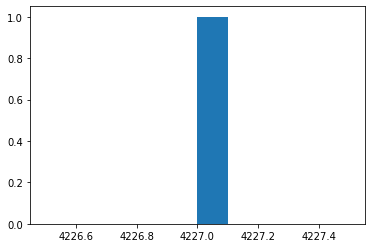

In [28]:
x=[len(c) for c in subgraphs]
plt.hist(x)
print(x)

In [29]:
# Islands method
#This function will return a list of graph objects, each corresponding to a specific water level.

In [11]:
def trim_edges(G, weight=1):
    g2=nx.Graph()
    for f, to, edata in G.edges(data=True):
        #print(f, to, edata)
        if edata['weight'] > weight:
            g2.add_edge(f,to,weight=edata['weight'])
    return g2

In [13]:
def island_method(G, iterations=100):
    weights= [edata['weight'] for f,to,edata in G.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    print('min:',mn,'max:',mx)
    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)
    print('step:',step)

    return [[threshold, trim_edges(G, threshold)] for threshold in range(mn,mx,step)]

In [59]:
cc=[G.subgraph(c) for c in nx.connected_components(G)]
print(len(cc))
for comp in cc:
    islands=island_method(comp)
    for i in islands:
    # print the threshold level, size of the graph, and number of connected components
        #i[0]: threshold wight ; len(i[1]): number of nodes in the trimmed graph ; 3: number of components in trimmed network
        print(i[0], len(i[1]), len([G.subgraph(c) for c in nx.connected_components(i[1])]))

1
min: 1 max: 118385
step: 1183
1 3974 1
1184 1276 1
2367 995 1
3550 853 1
4733 737 1
5916 643 1
7099 589 1
8282 541 1
9465 480 1
10648 457 1
11831 429 1
13014 409 1
14197 390 1
15380 372 1
16563 345 1
17746 314 1
18929 304 1
20112 292 1
21295 277 1
22478 266 1
23661 260 1
24844 254 1
26027 246 1
27210 237 1
28393 229 1
29576 224 1
30759 213 1
31942 205 1
33125 198 1
34308 190 1
35491 187 1
36674 183 1
37857 173 1
39040 160 1
40223 154 1
41406 150 1
42589 141 1
43772 138 1
44955 132 1
46138 129 1
47321 126 1
48504 123 1
49687 119 1
50870 115 1
52053 112 1
53236 107 1
54419 102 1
55602 99 1
56785 95 1
57968 91 1
59151 91 1
60334 89 1
61517 85 1
62700 81 1
63883 77 1
65066 74 1
66249 71 1
67432 70 1
68615 69 1
69798 64 1
70981 59 1
72164 56 1
73347 52 1
74530 49 1
75713 47 1
76896 44 1
78079 43 1
79262 38 1
80445 38 1
81628 35 1
82811 35 1
83994 35 1
85177 34 1
86360 33 1
87543 29 1
88726 27 1
89909 23 1
91092 22 1
92275 18 1
93458 16 1
94641 13 1
95824 11 1
97007 9 1
98190 8 1
99373 8 1

In [33]:
#Lovain methof

In [68]:
partition = community_louvain.best_partition(G, resolution=0.88, weight='weight')

In [69]:
num_of_partitions = len(set(partition.values()))
print(num_of_partitions)

6


In [71]:
api_hash_fract = {}
for key, value in partition.items():
    api_hash_fract[key] = value

In [80]:
louvain_clusters = {}
for i in range(num_of_partitions):
    clust = []
    for key, value in api_hash_fract.items():
        if value == i:
            clust.append(key)
    louvain_clusters[i] = clust


In [84]:
for i in range(num_of_partitions):
    print(len(louvain_clusters[i]))

3097
685
224
15
15
51


In [ ]:
# ego networks

In [15]:
doc_ego = nx.ego_graph(G,'document', radius=4)

In [17]:
print(len())


<a href="fds" class="dfg"></a>
